In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_excel('latency_results.xlsx')

print(data.head().to_string())
df = pd.DataFrame(data)

                                                    image image_size  threshold    latency
0  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.1  94.797850
1  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.5  88.216782
2  imagen_001_jpg.rf.2a634f01a533e3e1518c478c8d4dde0f.jpg    144x256        0.9  87.718964
3  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg    144x256        0.1  87.169886
4  imagen_002_jpg.rf.39766b197a04d8d1569b3e546fd07390.jpg    144x256        0.5  86.594820


In [2]:
# Agrupando resultados por threshold
resultados = df.groupby('threshold')['latency'].agg(['max', 'min', 'mean']).reset_index()
resultados.columns = ['threshold', 'latencia_maxima', 'latencia_minima', 'latencia_promedio']

print(resultados)

   threshold  latencia_maxima  latencia_minima  latencia_promedio
0        0.1        94.797850        83.708048          86.110708
1        0.5        95.735073        83.897114          86.718624
2        0.9       132.765055        83.868980          87.006167


# Histograma por separado

<Figure size 1200x600 with 0 Axes>

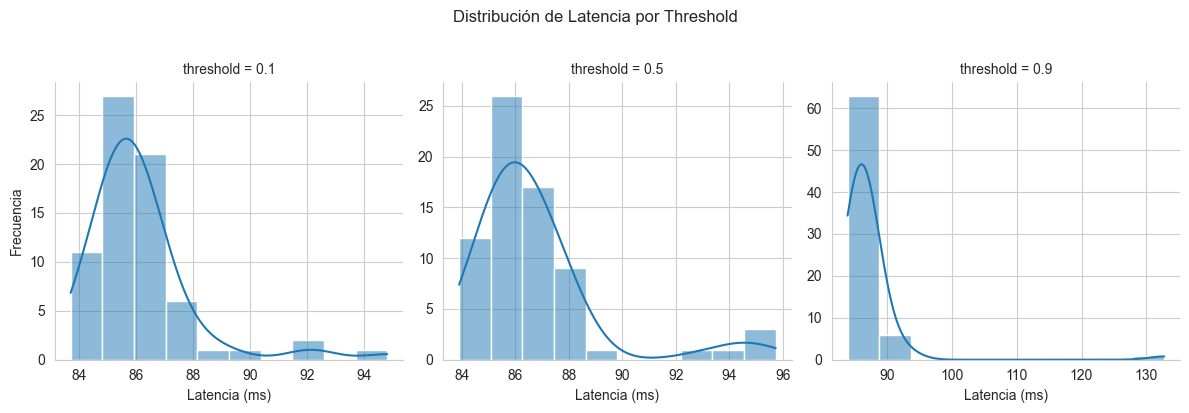

In [3]:
# Configuración del estilo
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Crear histogramas separados por threshold
g = sns.FacetGrid(df, col="threshold", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, "latency", bins=10, kde=True)

# Añadir títulos y etiquetas
g.set_axis_labels("Latencia (ms)", "Frecuencia")
g.fig.suptitle("Distribución de Latencia por Threshold", y=1.02)

plt.tight_layout()
plt.show()

# Grafico de distribucion

/var/folders/jf/mtmp9vvj5qdfvc_x4zl5yz7m0000gn/T/ipykernel_6152/251489067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='threshold', y='latency', palette='Set2')


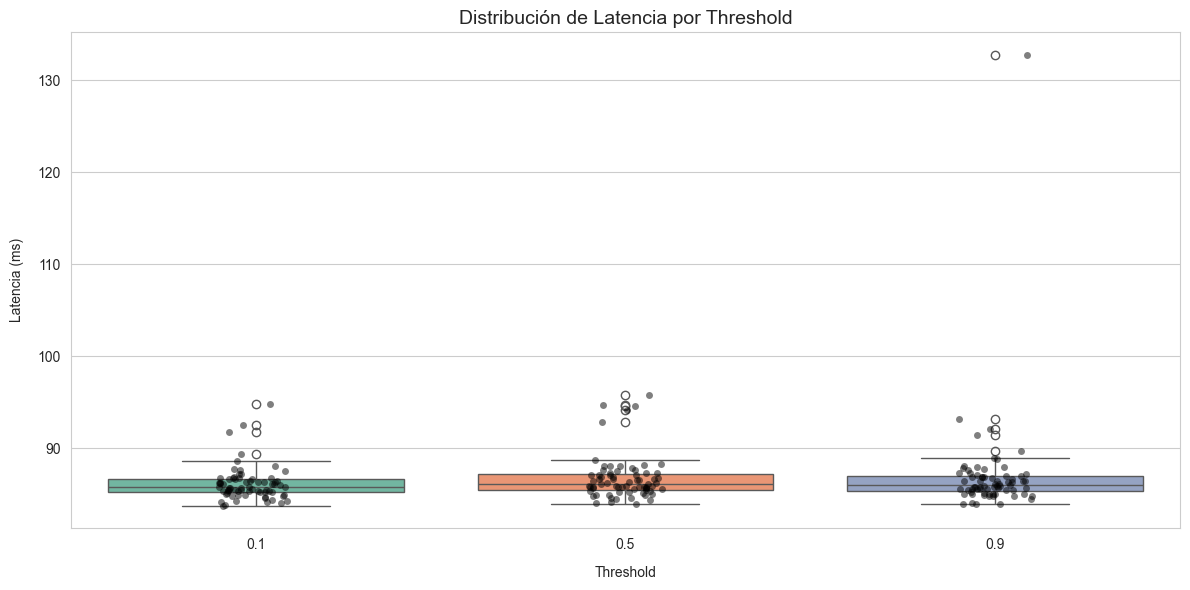

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='threshold', y='latency', palette='Set2')

plt.title('Distribución de Latencia por Threshold', fontsize=14)
plt.xlabel('Threshold', labelpad=10)
plt.ylabel('Latencia (ms)', labelpad=10)

# Añadir puntos individuales
sns.stripplot(data=df, x='threshold', y='latency', 
              color='black', alpha=0.5, jitter=True)

plt.tight_layout()
plt.show()